# Solving the $\omega$ equation by Greens function
### in a small patch of atmosphere, treated as a Cartesian xyz block

### Wikipedia's version
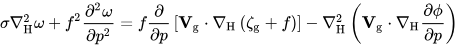 
with $\sigma$ = static stability parameter from dT/dt term ω$\sigma$

## The Idea: 

#### Invert the operator on the LHS to obtain $\omega$, treating the RHS terms as a 3D array of "forcing" in some finite patch of the atmosphere, where we will treat f and $\sigma$ as constants. (Those forcing terms are easily computed elsewhere, they just involve differentiation and multiplication of data arrays). 

### To do the inversion of the 3D array of forcing, there are four steps: 

1. Enforce $\omega$ = 0 at the surface using an ["image" or mirrored copy](https://en.wikipedia.org/wiki/Method_of_images) of the forcing, in a fictitious flipped copy of the atmosphere below the surface. This doubles the forcing array size in the vertical. 
2. Pad the doubled forcing data array with zeros on all sides. This increases the now-doubled initial array size by (3x3x3) = 27 times. So it's a 52x bigger array than the original forcing.
3. For each gridpoint in the forcing, the induced $\omega$ is proportional to 1/distance (1/r), rescaling distance in pressure coordinates according to $r = [\Delta x^2 + \Delta y^2 + \Delta z^2]^{1/2} = [\Delta x^2 + \Delta y^2 + (\sigma/f_o^2)\Delta p^2]^{1/2}$. So we loop over all the forcing points by rolling the array systematically, and sum up all these induced contributions, dividing by an array of r we have to calculate just once.
4. In the results array, shave off all the padded and mirrored regions to recover the result in the original array size and shape of the forcing. 

In [1]:
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt